<a href="https://colab.research.google.com/github/ArielaLevkov/ImageProcessingTA/blob/main/ImageProcessingRecitation_02_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">

# 2. קבצי תמונה

<div>


<div dir="rtl">

**תמונה דיגיטלית היא מטריצה של פיקסלים**

**פיקסל:** האלמנט הקטן ביותר שניתן להתייחס אליו בתמונה דיגיטלית. הטווח שלו הוא: $[0,255]. כאשר 255 מייצג לבן מוחלט ו0 מייצג שחור מוחלט וכל הערכים בין לבין הם גווני אפור.


לעיתים נוח לנרמל את הערכים לטווח [0,1] ע"י חלוקה ב255

פעולות בסיסיות בעיבוד תמונה מתבצעות באמצעות פעולות מטריציוניות בין מטריצות כמו חיבור, חיסור, כפל וחילוק.

<div>

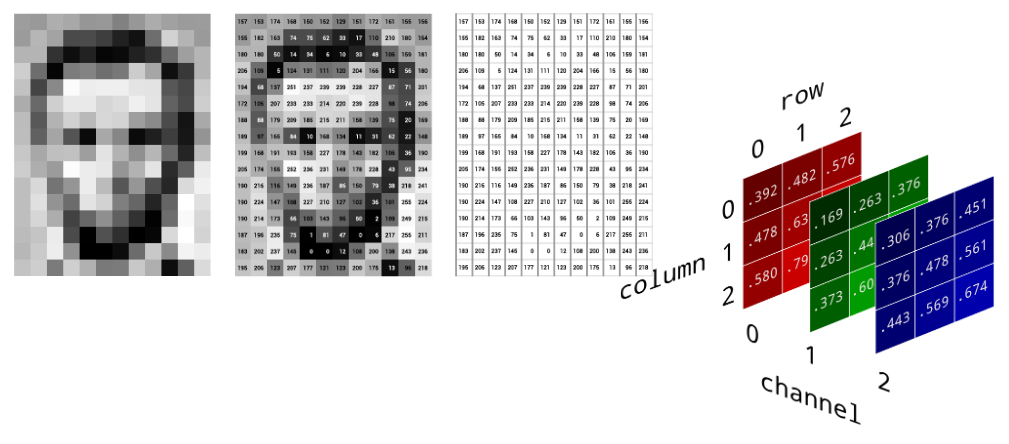

<div dir="rtl">

## 2.1 גישה לקבצי תמונה

תמונה דיגיטלית היא קובץ המאוחסן במחשב או בענן, ואנחנו צריכים תחילה לטעון אותו לתוך פייתון כדי שנוכל עליו פעולות.
נלמד על 2 דרכים לטעינת התמונה:

<div>

<div dir="rtl">

### 2.1.1 גישה דרך Google Drive

<div>

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

<div dir="rtl">

**הספריות שנשתמש בהם:**

**os:** מאפשרת עבודה עם קבצים ונתיבים במערכת ההפעלה, למשל חיבור נתיב מלא לקובץ תמונה.

**requests:** מיועדת להורדת קבצים מהאינטרנט, לדוגמה טעינת תמונה המאוחסנת ב־GitHub.

**BytesIO:** מאפשרת לקרוא קובץ ישירות מהזיכרון (מזרם נתונים שהורד מהרשת) מבלי לשמור אותו פיזית על הדיסק.

**NumPy (np)**: משמשת לייצוג תמונה כמטריצה ולביצוע פעולות מתמטיות על פיקסלים — חיבור, חיסור, כפל, חילוק ונרמול.

**matplotlib.pyplot (plt):** ספרייה גרפית שמשמשת להצגה ויזואלית של תוצאות ושלבי עיבוד שונים.

**PIL.Image:** מתוך ספריית Pillow — משמשת לפתיחת תמונות, והמרה שלהם לפורמטים שונים והצגתן על המסך.

<div>


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


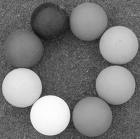

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
GOOGLE_DRIVE_PATH = "drive/My Drive/ImageProcessing"
fname = 'balls1.tiff'
fp = os.path.join(GOOGLE_DRIVE_PATH, fname)

from PIL import Image
img = Image.open('/content/drive/My Drive/ImageProcessing/balls1.tiff')
img


<div dir="rtl">

### 2.1.2 גישה דרך GitHub

לשם הנוחות נטען את קבצי התמונות מהריפו של התרגול:

<div>

In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/ArielaLevkov/ImageProcessing/main/images/'

In [ ]:
def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Ariela's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

<div dir="rtl">


אחרי שטענו את התמונה למחשב ניתן לקרוא אותה ולהוציא נתונים עליה כמו ערך מקסימלי,ערך מינימלי וממוצע.

<div>

## 2.2 Read image into Numpy array

In [ ]:
img = read_file(fname='house.tiff')
img2 = read_file(fname='balls1.tiff')

In [ ]:
print(img.shape)     # Grayscale shape size is 2

print(img2.shape)

(293, 450)
(139, 140)


In [ ]:
print(img)  # type should be [0, 255](int) or [0.0, 1.0](float)

[[110 110 110 ... 146 146 146]
 [110 110 110 ... 144 148 148]
 [111 111 111 ... 155 158 158]
 ...
 [ 87  87  86 ... 124 101  87]
 [ 80  79  79 ... 120 100  90]
 [ 80  79  79 ... 120 122 112]]


In [ ]:
print(img.max(),img.min(),int(img.mean()))

254 0 137


<div dir="rtl">

ניתן גם להציג את התמונה באופן ויזואלי ע"י:

<div>

254 0 137


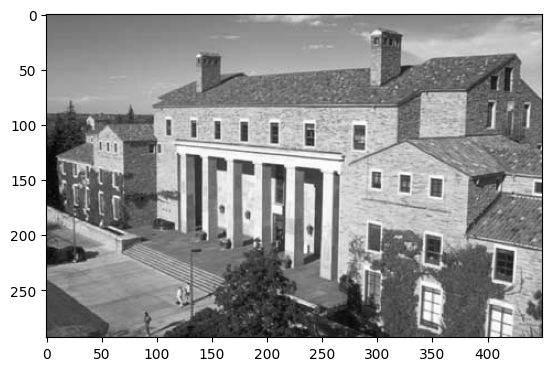

In [ ]:
plt.imshow(img,  cmap='gray', vmin=0, vmax=255);

<div dir="rtl">

ניתן גם לנרמל את ערכי הפיקסלים של התמונה לפי הטווח [0,255] כלומר לחלק ב255.

שימו לב שהתמונה באופן ויזואלי תשאר אותה הדבר רק ערכי הפיקסלים ינורמלו והפעולות עליהם יהיו פשוטות יותר.

<div>

0.996078431372549 0.0 0


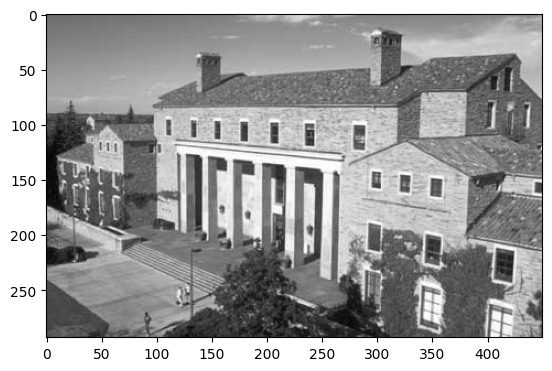

In [ ]:
img_n = img / 255
plt.imshow(img_n,  cmap='gray');
print(img_n.max(),img_n.min(),int(img_n.mean()))

<div dir="rtl">

## 2.3 מניפולציות על התמונה

<div>

<div dir="rtl">

הבהרה או הכהה של תמונה, ניתן להוסיף/להחסיר מכל פיקסל ערך מסויים:

<div>

354 100 237


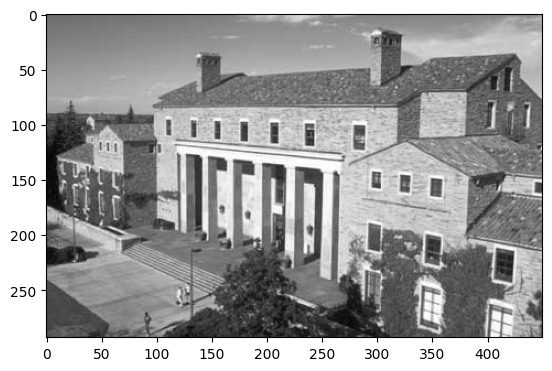

In [ ]:
img_bright = img + 100
print(img_bright.max(),img_bright.min(),int(img_bright.mean()))
plt.imshow(img_bright, cmap='gray');

154 -100 37


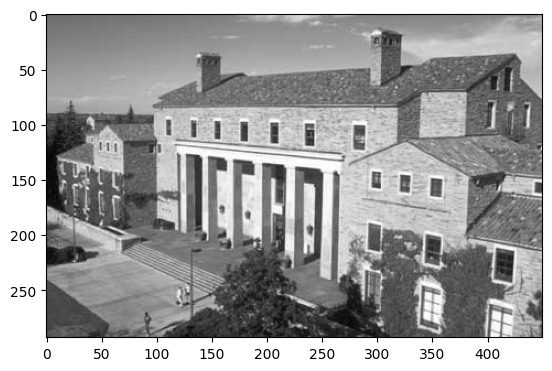

In [ ]:
img_dark = (img - 100)
print(img_dark.max(),img_dark.min(),int(img_dark.mean()))
plt.imshow(img_dark, cmap='gray');

<div dir="rtl">

לא נראה שיש שינוי כלשהו ולכן
צריך להיזהר מ overflow / underflow ע"י תיחום הקצוות:

<div>

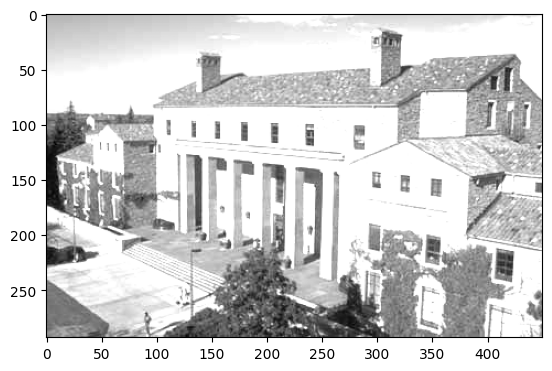

In [ ]:
img_bright = (img + 100).clip(max=255)
plt.imshow(img_bright, cmap='gray');

<div dir="rtl">

אם התמונה הייתה מוגדרת מראש כ**int8** ולא **int16** היינו נתקלים בבעיה אחרת של גלגול הערכים שגלשו.

כלומר אם הוספנו ל240 עוד 50 נקבל 290 שאינו בטווח ולכן הוא "יתגלגל" אחורה להיות 35 וכעת במקום שיהיה יותר בהיר הוא ניהיה יותר כהה:

<div>

127 -128 -32


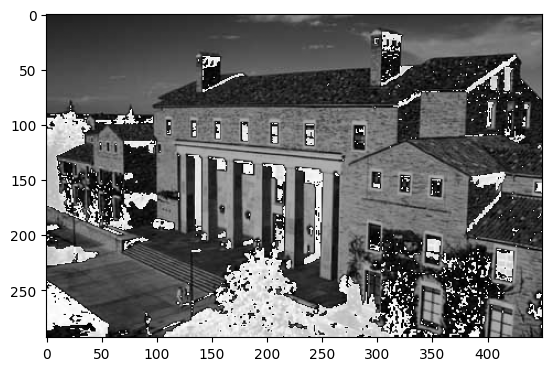

In [ ]:
img_int8 = np.array(img, dtype='int8')
img_overflow = img_int8 + 50
print(img_overflow.max(),img_overflow.min(),int(img_overflow.mean()))
plt.imshow(img_overflow, cmap='gray');

<div dir="rtl">

חיתוך התמונה

<div>

293 450
146 225
[[220 245 251 ... 179 184 186]
 [229 228 201 ... 182 201 201]
 [225 142  84 ... 203 212 209]
 ...
 [121 122 124 ... 202 196 196]
 [120 119 124 ... 194 199 204]
 [119 115 119 ... 197 211 217]]


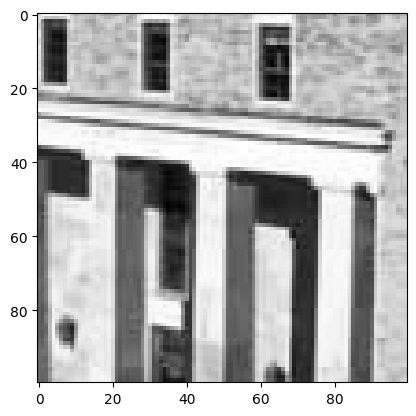

In [ ]:
nrows, ncols =img.shape
print(nrows,ncols)
rows_center = nrows // 2 # find the image center row (half of total rows)
cols_center = ncols // 2 # find the image center column (half of total columns)
print(rows_center,cols_center)
img_center = img[rows_center-50:rows_center+50, cols_center-50:cols_center+50].copy()
print(img_center)
plt.imshow(img_center, cmap='gray');

<div dir="rtl">

## 2.4 תמונות צבע

<dir>

<div dir="rtl">

תמונות צבעניות - בעלות 3 ערוצים: R,G,B

<dir>

(400, 810, 3)


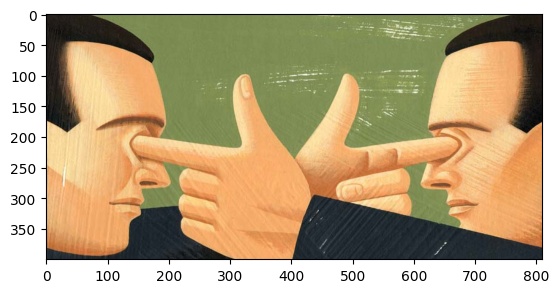

In [ ]:
img_color = read_file(fname='faces-rgb.tiff')
plt.imshow(img_color);
print(img_color.shape)  # RGB shape size is 3

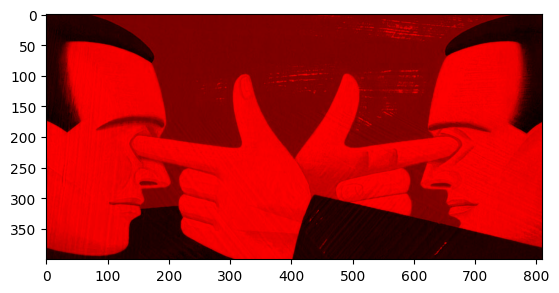

In [ ]:
img_r = img_color.copy()
img_r[:, :, 1] = 0
img_r[:, :, 2] = 0
plt.imshow(img_r);  # Red channel

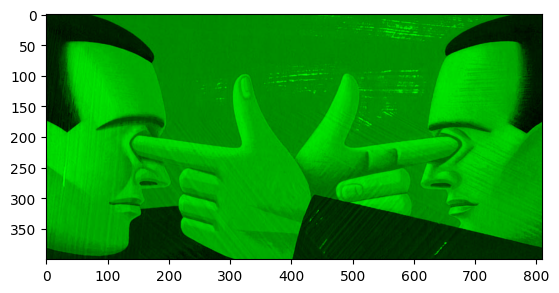

In [ ]:
img_g = img_color.copy()
img_g[:, :, 0] = 0
img_g[:, :, 2] = 0
plt.imshow(img_g);    # Green channel